In [1]:
# series.py

from decimal import Decimal

series_pow = Decimal(-1.0) / Decimal(3)


def nth_term(n):
    if n < 1:
        raise AttributeError('n should be bigger than zero.')
    return Decimal(n + 6) ** series_pow


def partial_sum(n, polynomial=nth_term):
    if n < 1:
        raise AttributeError('n should be bigger than zero.')
    res = Decimal(0)
    for i in range(1,n + 1):
        next_term = polynomial(i)
        res = res + next_term
    return res

In [2]:
from sys import argv
import numpy as np
import matplotlib.pyplot as plt
from sympy import integrate, oo, limit
from sympy.abc import x
import math

In [3]:
# number of terms
n = 10000

In [4]:
terms = np.zeros(n, Decimal)
sums = np.zeros(n, Decimal)

padding = len(argv[1])
# calculate n terms
for i in range(0, n):
    index = i + 1
    terms[i] = (nth_term(index))

sums[0] = nth_term(1)
for i in range(1, n):
    # calculate n partial sums
    sums[i] = sums[i - 1] + terms[i]

In [5]:
# check d'Alambert ratio
x0 = math.inf
ratio_limit = limit((x + 7) ** (-1/3) / ((x + 6) ** (-1/3)), x, x0)

convergence = "divergent"
if ratio_limit < 1:
    convergence = "convergent"
elif ratio_limit == 1:
    convergence = "can't state"
    
print("d'Alembert ratio: %s | %s" % (convergence, terms[n - 1] / terms[n - 2]))

d'Alembert ratio: can't state | 0.9999666855448332640079436211


In [6]:
# check Cauchy ratio
I = integrate((x + 6) ** (-1 / 3), x, (x, 1, oo))
is_convergent = I != math.inf and I != -math.inf
print("Cauchy ratio: %s" % ("convergent" if is_convergent else "divergent"))

Cauchy ratio: divergent


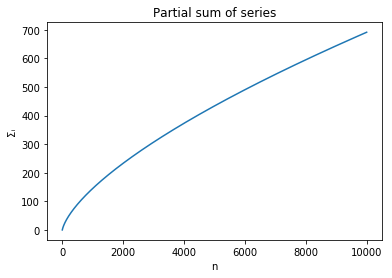

In [7]:
# partial sums plot
plt.plot(range(1, n + 1), sums)
plt.title("Partial sum of series")
plt.ylabel("\u03A3\u1D62")
plt.xlabel("n")
plt.show()

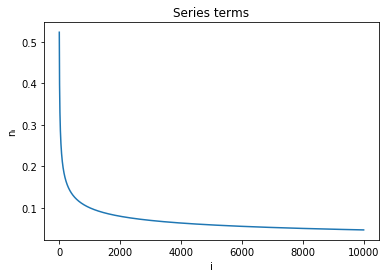

In [8]:
# terms plot
plt.plot(range(1, n+1), terms)
plt.title("Series terms")
plt.ylabel("n\u1D62")
plt.xlabel("i")
plt.show()